In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import tarfile
from io import BytesIO
import os

import requests

url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"


def load_imdb_dataset(extract_path, overwrite=False):
    # check if existed already
    if (
        os.path.isfile(os.path.join(extract_path, "aclImdb", "README"))
        and not overwrite
    ):
        print("IMDB dataset is already in place.")
        return

    print("Downloading the dataset from:  ", url)
    response = requests.get(url)

    tar = tarfile.open(mode="r:gz", fileobj=BytesIO(response.content))

    data = tar.extractall(extract_path)

In [4]:
load_imdb_dataset(extract_path="/data")

IMDB dataset is already in place.


In [35]:
from sklearn.datasets import load_files

df_train = load_files(os.path.join('/data/aclImdb', 'train'), categories=['pos', 'neg'])
X_train_text, y_train = df_train.data, df_train.target

df_test = load_files(os.path.join('/data/aclImdb', 'test'), categories=['pos', 'neg'])
X_test_text, y_test = df_test.data, df_test.target

In [36]:
len(X_train_text), len(X_test_text)

(25000, 25000)

In [37]:
X_train_text[0], y_train[0]

(b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.",
 1)

In [38]:
X_train_text[1], y_train[1]

(b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decision" should without a doubt be you\'re choice over this one, even the "Turbulen

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv.fit(X_train_text)

CountVectorizer()

In [15]:
len(cv.vocabulary_)

74849

In [16]:
cv.get_feature_names_out()[:50]

array(['00', '000', '0000000000001', '00001', '00015', '000s', '001',
       '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am',
       '00pm', '00s', '01', '01pm', '02', '020410', '029', '03', '04',
       '041', '05', '050', '06', '06th', '07', '08', '087', '089', '08th',
       '09', '0f', '0ne', '0r', '0s', '10', '100', '1000', '1000000',
       '10000000000000', '1000lb', '1000s', '1001', '100b', '100k',
       '100m'], dtype=object)

In [17]:
cv.get_feature_names_out()[50000:50050]

array(['pincher', 'pinchers', 'pinches', 'pinching', 'pinchot',
       'pinciotti', 'pine', 'pineal', 'pineapple', 'pineapples', 'pines',
       'pinet', 'pinetrees', 'pineyro', 'pinfall', 'pinfold', 'ping',
       'pingo', 'pinhead', 'pinheads', 'pinho', 'pining', 'pinjar',
       'pink', 'pinkerton', 'pinkett', 'pinkie', 'pinkins', 'pinkish',
       'pinko', 'pinks', 'pinku', 'pinkus', 'pinky', 'pinnacle',
       'pinnacles', 'pinned', 'pinning', 'pinnings', 'pinnochio',
       'pinnocioesque', 'pino', 'pinocchio', 'pinochet', 'pinochets',
       'pinoy', 'pinpoint', 'pinpoints', 'pins', 'pinsent'], dtype=object)

In [40]:
X_train = cv.transform(X_train_text)
X_train

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3445861 stored elements in Compressed Sparse Row format>

In [20]:
X_train[0].nonzero()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]),
 array([ 1639,  1657,  2768,  3258,  3718,  4124,  6334,  6663,  7095,
         7145,  7518,  8714,  8724,  9881, 10582, 12582, 12694, 13616,
        13635, 15137, 16697, 16929, 17169, 17920, 18292, 19326, 21284,
        22718, 23188, 23785, 24536, 24569, 24978, 25450, 26180, 27312,
        27619, 29369, 30118, 31486, 31488, 32047, 33004, 34585, 34683,
        38088, 38762, 42153, 43375, 43572, 44044, 44147, 44461, 44560,
        44618, 46050, 46680, 47196, 47440, 47889, 49221, 51857, 53613,
        53749, 54754, 58585, 60620, 60766, 64223, 66136, 66150, 66299,
        66322, 66339, 66367, 66474, 66526, 66925, 67125, 68769, 69287,
        71205, 72703, 72904, 72965, 73342, 

In [41]:
X_test = cv.transform(X_test_text)

In [23]:
%%time
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(n_jobs=-1)
lr.fit(X_train, y_train)

CPU times: total: 62.5 ms
Wall time: 6.07 s


LogisticRegression(n_jobs=-1)

In [25]:
round(lr.score(X_train, y_train), 3), round(lr.score(X_test, y_test), 3)

(0.981, 0.863)

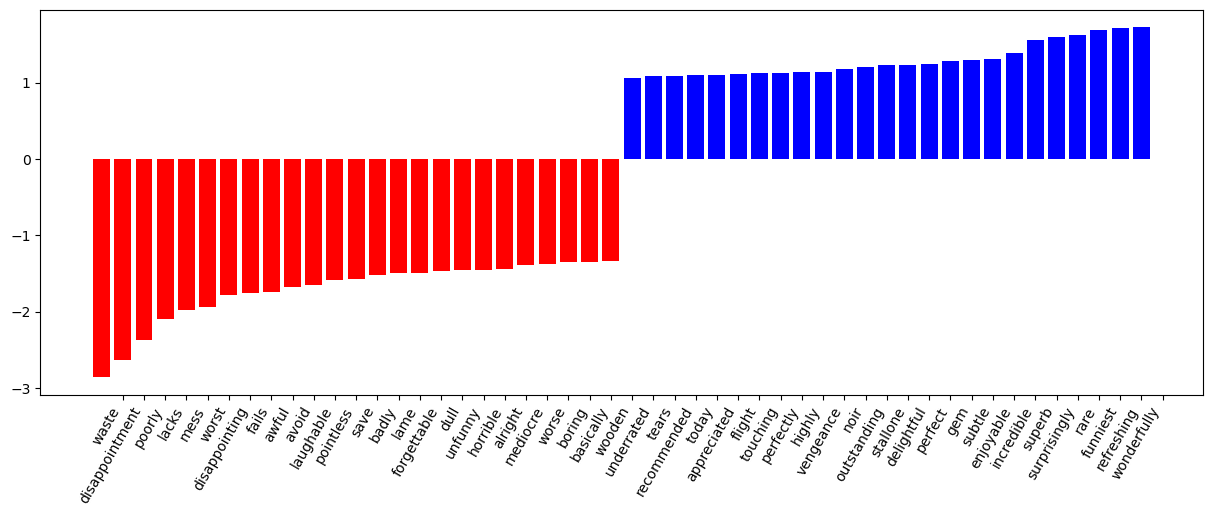

In [33]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(
        np.arange(1, 1 + 2 * n_top_features),
        feature_names[interesting_coefficients],
        rotation=60,
        ha="right",
    );
def plot_grid_scores(grid, param_name):
    plt.plot(
        grid.param_grid[param_name],
        grid.cv_results_["mean_train_score"],
        color="green",
        label="train",
    )
    plt.plot(
        grid.param_grid[param_name],
        grid.cv_results_["mean_test_score"],
        color="red",
        label="test",
    )
    plt.legend();
visualize_coefficients(lr, cv.get_feature_names_out());

In [42]:
%%time
from sklearn.pipeline import make_pipeline

text_lr = make_pipeline(
    CountVectorizer(),
    LogisticRegression(n_jobs=-1)
)
text_lr.fit(X_train_text, y_train)
text_lr.score(X_test_text, y_test)

CPU times: total: 844 ms
Wall time: 14.1 s


0.86304

In [43]:
%%time
from sklearn.model_selection import GridSearchCV

lr_params = {'logisticregression__C': np.logspace(-5,0,6)}
lr_grid = GridSearchCV(text_lr, lr_params, return_train_score=True, cv=3, n_jobs=-1)
lr_grid.fit(X_train_text, y_train)

CPU times: total: 2.41 s
Wall time: 41.4 s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('logisticregression',
                                        LogisticRegression(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
             return_train_score=True)

In [44]:
lr_grid.best_params_, lr_grid.best_score_

({'logisticregression__C': 0.1}, 0.8854399292362384)

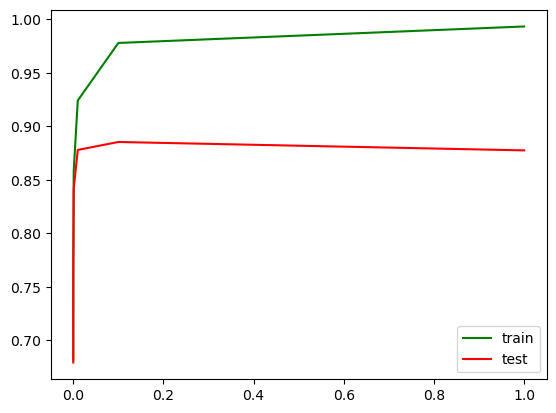

In [45]:
plot_grid_scores(lr_grid, 'logisticregression__C')

In [46]:
lr_grid.score(X_test_text, y_test)

0.87812

In [47]:
%%time

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=200, n_jobs=-1)
forest.fit(X_train, y_train)

CPU times: total: 7min 33s
Wall time: 46.5 s


RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [48]:
round(forest.score(X_test, y_test), 3)

0.855

In [52]:
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

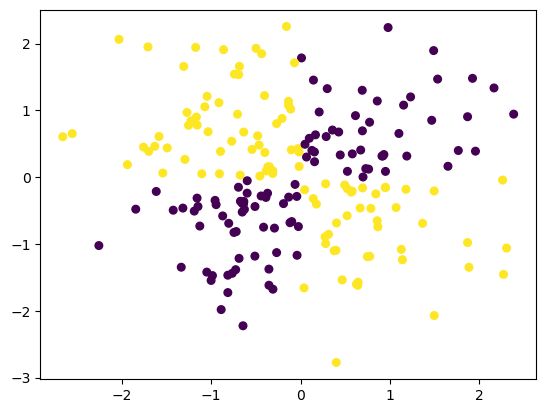

In [55]:
plt.scatter(X[:, 0], X[:, 1], s=30, c=y)

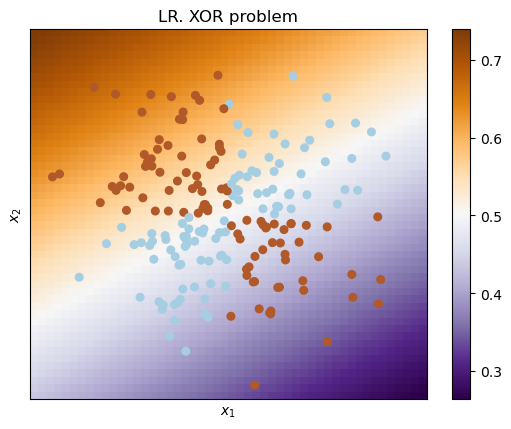

In [59]:
def plot_boundary(clf, X, y, plot_title):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
    clf.fit(X, y)
    # plot the decision function for each datapoint on the grid
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    image = plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        aspect="auto",
        origin="lower",
        cmap=plt.cm.PuOr_r,
    )
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2)
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title(plot_title, fontsize=12);
plot_boundary(LogisticRegression(), X, y, 'LR. XOR problem')

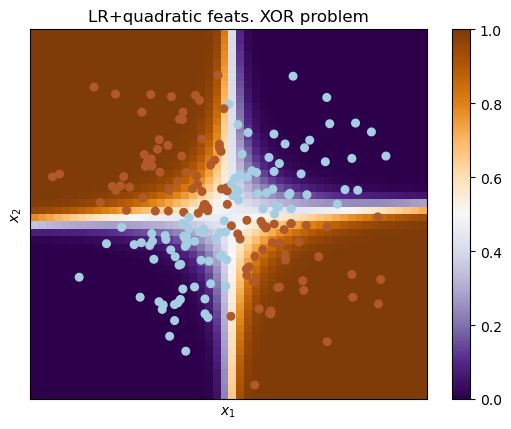

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

lr_poly_pipe = Pipeline(
    [
        ('poly', PolynomialFeatures(degree=2)),
        ('lr', LogisticRegression())
    ]
)
plot_boundary(lr_poly_pipe, X, y, "LR+quadratic feats. XOR problem")

In [61]:
url = 'https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/telecom_churn.csv'
df = pd.read_csv(url).drop("State", axis=1)
df["International plan"] = df["International plan"].map({"Yes": 1, "No": 0})
df["Voice mail plan"] = df["Voice mail plan"].map({"Yes": 1, "No": 0})

y = df["Churn"].astype("int").values
X = df.drop("Churn", axis=1).values

In [66]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve, validation_curve

alphas = np.logspace(-2,0,20)
sgd_lr = SGDClassifier(n_jobs=-1)
lr_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('sgd_lr', sgd_lr)
    ]
)
val_train, val_test = validation_curve(
    lr_pipe, X, y, param_name='sgd_lr__alpha', param_range=alphas, cv=5, scoring='roc_auc'
)

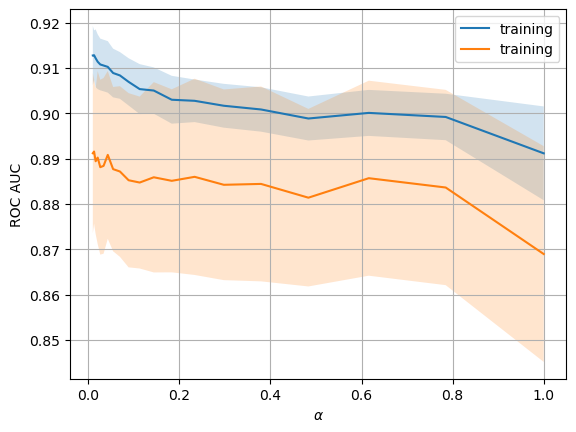

In [78]:
def plot_with_err(x,data,**kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(
        x,
        mu-std,
        mu+std,
        alpha=0.2
    )

    
plot_with_err(alphas, val_train, label='training')
plot_with_err(alphas, val_test, label='training')
plt.xlabel(r'$\alpha$')
plt.ylabel('ROC AUC')
plt.legend()
plt.grid(True)

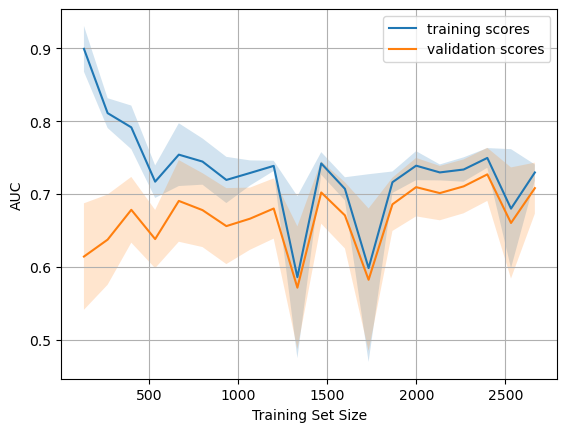

In [80]:
def plot_learning_curve(degree=2, alpha=0.01):
    train_sizes = np.linspace(0.05, 1, 20)
    logit_pipe = Pipeline(
        [
            ("scaler", StandardScaler()),
            ("poly", PolynomialFeatures(degree=degree)),
            (
                "sgd_logit",
                SGDClassifier(n_jobs=-1, random_state=17, alpha=alpha),
            ),
        ]
    )
    N_train, val_train, val_test = learning_curve(
        logit_pipe, X, y, train_sizes=train_sizes, cv=5, scoring="roc_auc"
    )
    plot_with_err(N_train, val_train, label="training scores")
    plot_with_err(N_train, val_test, label="validation scores")
    plt.xlabel("Training Set Size")
    plt.ylabel("AUC")
    plt.legend()
    plt.grid(True);
    
    
plot_learning_curve(degree=2, alpha=10)

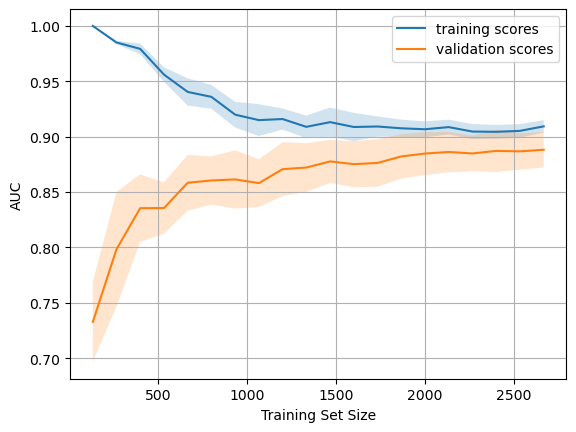

In [81]:
plot_learning_curve(degree=2, alpha=0.05)


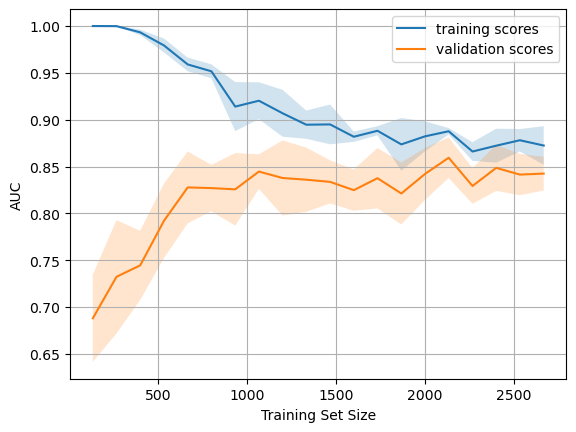

In [87]:
plot_learning_curve(degree=2, alpha=1e-4)

In [88]:
df = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/winequality-white.csv', sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [94]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, LassoCV, LinearRegression

In [98]:
y = df.quality
X = df.drop('quality', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [100]:
mean_squared_error(y_train, linreg.predict(X_train_scaled))

0.559147909436852

In [102]:
mean_squared_error(y_test, linreg.predict(X_test_scaled))

0.5779974028998316

In [105]:
linreg_coef = pd.DataFrame(
    {'coef': linreg.coef_, 'coef_abs': np.abs(linreg.coef_)},
    index=df.columns.drop('quality')
)
linreg_coef

,coef,coef_abs
fixed acidity,0.079038,0.079038
volatile acidity,-0.201643,0.201643
citric acid,0.004109,0.004109
residual sugar,0.491604,0.491604
chlorides,0.004326,0.004326
free sulfur dioxide,0.047821,0.047821
total sulfur dioxide,-0.007878,0.007878
density,-0.585771,0.585771
pH,0.121869,0.121869
sulphates,0.083534,0.083534


In [106]:
linreg_coef.sort_values('coef_abs', ascending=False)

,coef,coef_abs
density,-0.585771,0.585771
residual sugar,0.491604,0.491604
volatile acidity,-0.201643,0.201643
alcohol,0.154442,0.154442
pH,0.121869,0.121869
sulphates,0.083534,0.083534
fixed acidity,0.079038,0.079038
free sulfur dioxide,0.047821,0.047821
total sulfur dioxide,-0.007878,0.007878
chlorides,0.004326,0.004326


In [107]:
lasso1 = Lasso(alpha=0.01)
lasso1.fit(X_train_scaled, y_train)

Lasso(alpha=0.01)

In [108]:
lasso1_coef = pd.DataFrame(
    {'coef': lasso1.coef_, 'coef_abs': np.abs(lasso1.coef_)},
    index=df.columns.drop('quality')
)
lasso1

Lasso(alpha=0.01)

In [109]:
lasso1_coef.sort_values('coef_abs', ascending=False)

,coef,coef_abs
alcohol,0.325242,0.325242
residual sugar,0.240952,0.240952
density,-0.212176,0.212176
volatile acidity,-0.201873,0.201873
sulphates,0.051853,0.051853
pH,0.047827,0.047827
free sulfur dioxide,0.039688,0.039688
total sulfur dioxide,-0.004540,0.004540
chlorides,-0.003703,0.003703
fixed acidity,-0.001572,0.001572


In [112]:
alphas = np.logspace(-6, 2, 200)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

LassoCV(alphas=array([1.00000000e-06, 1.09698580e-06, 1.20337784e-06, 1.32008840e-06,
       1.44811823e-06, 1.58856513e-06, 1.74263339e-06, 1.91164408e-06,
       2.09704640e-06, 2.30043012e-06, 2.52353917e-06, 2.76828663e-06,
       3.03677112e-06, 3.33129479e-06, 3.65438307e-06, 4.00880633e-06,
       4.39760361e-06, 4.82410870e-06, 5.29197874e-06, 5.80522552e-06,
       6.36824994e-06, 6.98587975e-0...
       1.18953407e+01, 1.30490198e+01, 1.43145894e+01, 1.57029012e+01,
       1.72258597e+01, 1.88965234e+01, 2.07292178e+01, 2.27396575e+01,
       2.49450814e+01, 2.73644000e+01, 3.00183581e+01, 3.29297126e+01,
       3.61234270e+01, 3.96268864e+01, 4.34701316e+01, 4.76861170e+01,
       5.23109931e+01, 5.73844165e+01, 6.29498899e+01, 6.90551352e+01,
       7.57525026e+01, 8.30994195e+01, 9.11588830e+01, 1.00000000e+02]),
        cv=5)

In [113]:
lasso_cv.alpha_

0.00012315506032928262

In [117]:
lasso_cv_coef = pd.DataFrame(
    {'coef': lasso_cv.coef_, 'coef_abs': np.abs(lasso_cv.coef_)},
    index=df.columns.drop('quality')
)
lasso_cv_coef.sort_values('coef_abs', ascending=False)

,coef,coef_abs
density,-0.578613,0.578613
residual sugar,0.486891,0.486891
volatile acidity,-0.201687,0.201687
alcohol,0.157653,0.157653
pH,0.120340,0.120340
sulphates,0.083024,0.083024
fixed acidity,0.077151,0.077151
free sulfur dioxide,0.047765,0.047765
total sulfur dioxide,-0.007912,0.007912
citric acid,0.003989,0.003989


In [118]:
mean_squared_error(y_train, lasso_cv.predict(X_train_scaled))

0.5591495509855419

In [119]:
mean_squared_error(y_test, lasso_cv.predict(X_test_scaled))

0.5777391983120816

In [121]:
forest = RandomForestRegressor()
forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [122]:
mean_squared_error(y_train, forest.predict(X_train_scaled))

0.053818144690781805

In [123]:
np.mean(np.abs(cross_val_score(forest, X_train_scaled, y_train, scoring='neg_mean_squared_error')))

0.40591049009384783

In [124]:
mean_squared_error(y_test, forest.predict(X_test_scaled))

0.3801065986394559

In [125]:
forest_params = {'max_depth': range(10,25), 'max_features': range(6,12)}
best_forest = GridSearchCV(
    RandomForestRegressor(n_jobs=-1),
    forest_params,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    cv=5,
    verbose=True
)
best_forest.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': range(10, 25),
                         'max_features': range(6, 12)},
             scoring='neg_mean_squared_error', verbose=True)

In [126]:
best_forest.best_params_, best_forest.best_score_

({'max_depth': 22, 'max_features': 6}, -0.40054426592171233)

In [128]:
np.mean(np.abs(cross_val_score(best_forest.best_estimator_, X_train_scaled, y_train, scoring='neg_mean_squared_error')))

0.40359542593390296

In [129]:
mean_squared_error(y_test, best_forest.predict(X_test_scaled))

0.3815724959890684

In [133]:
rf_importance  = pd.DataFrame(
    best_forest.best_estimator_.feature_importances_,
    columns=['coef'],
    index=df.columns[:-1]
)
rf_importance .sort_values('coef', ascending=False)

,coef
alcohol,0.202000
volatile acidity,0.124403
free sulfur dioxide,0.102782
density,0.093368
residual sugar,0.079684
total sulfur dioxide,0.072493
chlorides,0.070546
pH,0.066280
fixed acidity,0.064752
sulphates,0.063446
